## Fuente de datos
### MT560
* Recopilación de diferentes corpus en inglés a un idioma de destino.
* La recopilación de este corpus tiene las siguientes fuentes para diferentes idiomas, el resto de información puede ser encontrado en: [MTData.recipes](https://github.com/thammegowda/016-many-eng-v2/blob/2bf3e75ce/data/mtdata.recipes.yml)

| Fuentes |
|-------|
| JW300 |
| OPUS100  |
| OPUSGnome |
| OPUSUbuntu |
| OPUS-bibleuedin |
| OPUS-wikimedia |

## Construcción del Corpus
### Variantes del quechua

| ISO 639-3 | Nombre                                  | País      | Oraciones | Tokens    |
|-----------|-----------------------------------------|-----------|-----------|-----------|
| QUZ       | Cusco Quechua                           | Perú      | 127,408   | 1,649,454 |
| QUY       | Ayacucho Quechua                        | Perú      | 113,702   | 1,402,781 |
| QVI       | Imbabura Highland Quichua               | Ecuador   | 50,527    | 672,711   |
| QUG       | Chimborazo Highland Quichua             | Ecuador   | 20,272    | 247,947   |
| QUW       | Tena Lowland Quichua                    | Ecuador   | 15,674    | 292,905   |

### Otras lenguas indígenas

| ISO 639-3 | Nombre              | País             | Oraciones | Tokens    |
|-----------|---------------------|------------------|-----------|-----------|
| YUA       | Yucateco            | México           | 168,299   | 3,524,830 |
| GUG       | Paraguayan Guaraní  | Paraguay         | 143,391   | 2,151,216 |
| TZO       | Tzotzil             | México           | 140,124   | 2,993,791 |
| AYM       | Aymara              | Bolivia/Perú     | 138,760   | 1,939,507 |
| MRI       | Maori               | Nueva Zelanda    | 62,963    | 2,151,493 |


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
basePath = "/content/drive/MyDrive/corpus_quechua"

## Load and clean data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
import re

basePath = "/content/drive/MyDrive/corpus_quechua"
df = pd.read_csv(f"{basePath}/filtered_corpus.csv")

tokenize = lambda x: word_tokenize(x)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-záéíóúüñ' ]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in all_stop_words]

df["Sentence"] = df["Sentence"].apply(clean_text)

lang_names = {
    "quz": "Cusco\nQuechua",
    "quy": "Ayacucho\nQuechua",
    "qvi": "Imbabura Highland\nQuichua",
    "qug": "Chimborazo Highland\nQuichua",
    "quw": "Tena Lowland\nQuichua",
    "yua": "Yucateco",
    "gug": "Paraguayan\nGuaraní",
    "tzo": "Tzotzil",
    "aym": "Aymara",
    "mri": "Maori"
}

quechua_langs = {"quz", "quy", "qvi", "qug", "quw"}
other_langs = {"yua", "gug", "tzo", "aym", "mri"}

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
def applyOneHot(df, langs):
  result_df = pd.DataFrame()
  result_df["Sentence"] = df["Sentence"]

  for lang in langs:
    result_df[lang] = (df["ISO"] == lang).astype(int)

  return result_df

In [6]:
df_quechua = df[df['ISO'].isin(quechua_langs)].copy()
df_other = df[df['ISO'].isin(other_langs)].copy()

df_quechua['Sentence'] = df_quechua['Sentence'].apply(tokenize)
df_quechua['Sentence'] = df_quechua['Sentence'].apply(lambda x: ' '.join(x))

df_other['Sentence'] = df_other['Sentence'].apply(tokenize)
df_other['Sentence'] = df_other['Sentence'].apply(lambda x: ' '.join(x))

df_quechua = applyOneHot(df_quechua, quechua_langs)
df_other = applyOneHot(df_other, other_langs)

In [14]:
df_quechua['Sentence'] = df_quechua['Sentence'].replace("", np.nan)
df_other['Sentence'] = df_other['Sentence'].replace("", np.nan)

In [15]:
df_quechua.dropna(subset=['Sentence'], inplace=True)
df_other.dropna(subset=['Sentence'], inplace=True)

In [16]:
df_quechua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326573 entries, 0 to 981109
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  326573 non-null  object
 1   qug       326573 non-null  int64 
 2   quy       326573 non-null  int64 
 3   quw       326573 non-null  int64 
 4   quz       326573 non-null  int64 
 5   qvi       326573 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 17.4+ MB


In [19]:
df_other.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652686 entries, 1 to 981119
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  652686 non-null  object
 1   yua       652686 non-null  int64 
 2   tzo       652686 non-null  int64 
 3   aym       652686 non-null  int64 
 4   mri       652686 non-null  int64 
 5   gug       652686 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 34.9+ MB


In [17]:
quechua_columns = ["quz", "quy", "qvi", "qug", "quw"]
df_quechua[quechua_columns].sum()

,0
quz,127102
quy,113297
qvi,50228
qug,20272
quw,15674


In [18]:
other_columns = ["yua", "gug", "tzo", "aym", "mri"]
df_other[other_columns].sum()

,0
yua,168090
gug,143288
tzo,139881
aym,138465
mri,62962


In [20]:
df_quechua.to_csv((f"{basePath}/quechua_labeled_corpus.csv"), index=False, encoding="utf-8")
df_other.to_csv((f"{basePath}/other_labeled_corpus.csv"), index=False, encoding="utf-8")

In [21]:
df_labeled_quechua = pd.read_csv(f"{basePath}/quechua_labeled_corpus.csv", encoding="utf-8")
df_labeled_other = pd.read_csv(f"{basePath}/other_labeled_corpus.csv", encoding="utf-8")

In [22]:
df_labeled_quechua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326573 entries, 0 to 326572
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  326573 non-null  object
 1   qug       326573 non-null  int64 
 2   quy       326573 non-null  int64 
 3   quw       326573 non-null  int64 
 4   quz       326573 non-null  int64 
 5   qvi       326573 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 14.9+ MB


In [23]:
df_labeled_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652686 entries, 0 to 652685
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  652686 non-null  object
 1   yua       652686 non-null  int64 
 2   tzo       652686 non-null  int64 
 3   aym       652686 non-null  int64 
 4   mri       652686 non-null  int64 
 5   gug       652686 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 29.9+ MB


## Red Neuronal Profunda

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
basePath = "/content/drive/MyDrive/corpus_quechua"
df_quechua_labeled = pd.read_csv(f"{basePath}/quechua_labeled_corpus.csv")

In [3]:
df_quechua_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326573 entries, 0 to 326572
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Sentence  326573 non-null  object
 1   qug       326573 non-null  int64 
 2   quy       326573 non-null  int64 
 3   quw       326573 non-null  int64 
 4   quz       326573 non-null  int64 
 5   qvi       326573 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 14.9+ MB


In [4]:
df_quechua_labeled.head()

,Sentence,qug,quy,quw,quz,qvi
0,allinta uyariychis,0,0,0,1,0
1,inculquen en sus hijos valores que los protejan,0,0,0,1,0
2,llaqtaykin llaqtay kanqa diosniykin diosniy kanqa,0,0,0,1,0
3,mamay ratollachu kutimunki,0,0,0,1,0
4,paqarisnintaq moisesqa llaqtata nirqan anchata...,0,0,0,1,0


In [5]:
X_text = df_quechua_labeled['Sentence'].values
y = df_quechua_labeled[['qug', 'quy', 'quw', 'quz', 'qvi']].values

In [6]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_text).toarray()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape[1]

1000

In [9]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(5, activation='softmax')
])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop]
)

loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8675 - loss: 0.2957 - val_accuracy: 0.8879 - val_loss: 0.2187
Epoch 2/10
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8946 - loss: 0.2102 - val_accuracy: 0.8904 - val_loss: 0.2145
Epoch 3/10
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8984 - loss: 0.2029 - val_accuracy: 0.8914 - val_loss: 0.2144
Epoch 4/10
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.9035 - loss: 0.1941 - val_accuracy: 0.8926 - val_loss: 0.2146
Epoch 5/10
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9075 - loss: 0.1866 - val_accuracy: 0.8915 - val_loss: 0.2171
Epoch 6/10
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9105 - loss: 0.1820 - val_accuracy: 0.8911 - val_loss: 0.2204
2042/2042 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8921 - loss: 0.2138


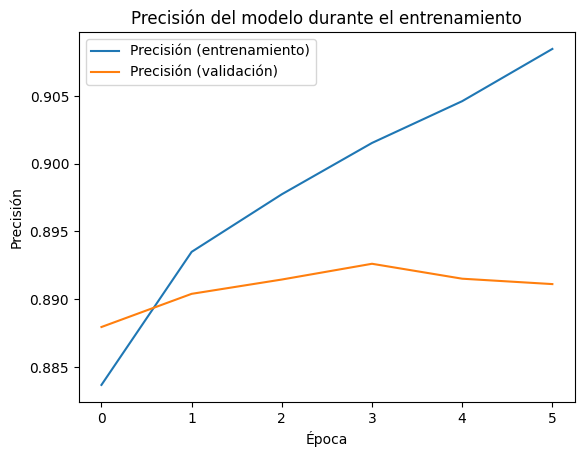

In [11]:
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title('Precisión del modelo durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
class_names = ['qug', 'quy', 'quw', 'quz', 'qvi']

2042/2042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


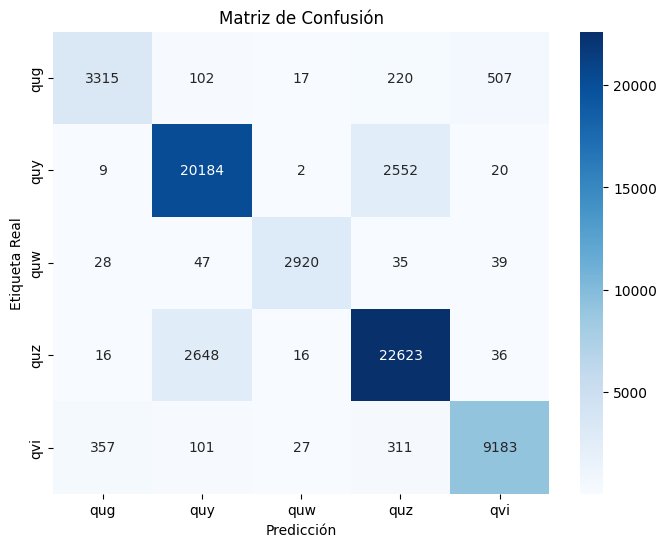

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()